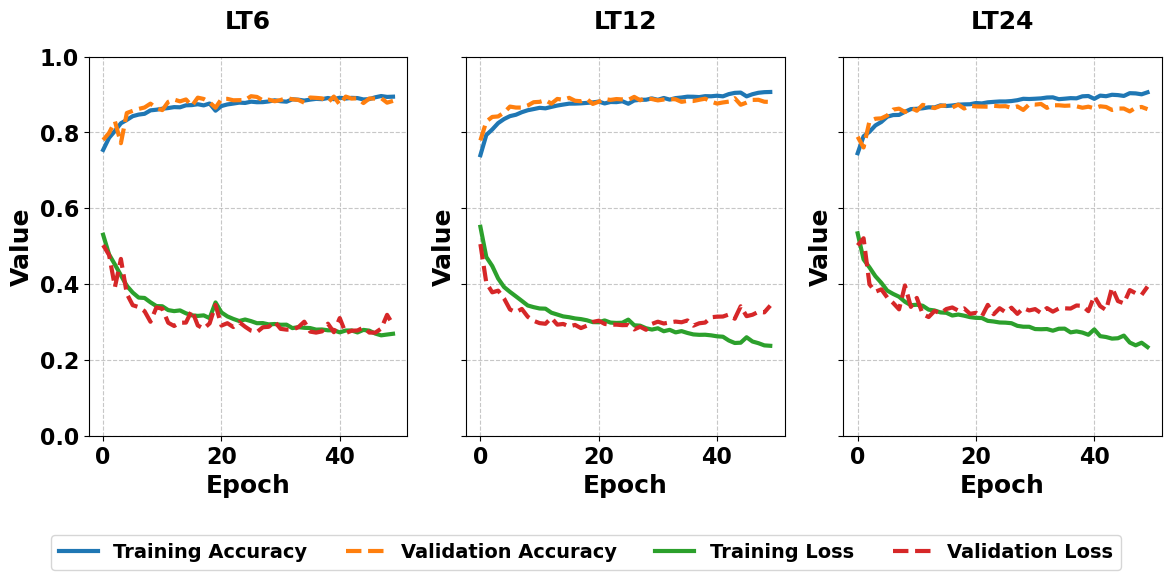

In [121]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the directories containing the .npy files
training_acc_folder = 'training_accuracy'
validation_acc_folder = 'validation_accuracy'
training_loss_folder = 'training_loss'
validation_loss_folder = 'validation_loss'

# Function to load and plot .npy files
def load_and_plot_npy(folder_path, file_prefix, label, ax, linestyle, color):
    # Get all .npy files starting with the specified prefix
    files = [f for f in os.listdir(folder_path) if f.startswith(file_prefix) and f.endswith('.npy')]
    
    # Plot each file
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = np.load(file_path)
        ax.plot(data, label=label, linewidth=3, linestyle=linestyle, color=color)

# Prefixes for different plots
prefixes = ["LT6", "LT12", "LT24"]
prefix_titles = ["LT6", "LT12", "LT24"]  # Titles for each subplot

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'text.color': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
})

# Create a figure with 1 row and 3 columns (one subplot per prefix)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Plot accuracy and loss curves together for each prefix
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, orange, green, red
for i, (prefix, title) in enumerate(zip(prefixes, prefix_titles)):
    ax = axes[i]
    ax.set_xlabel("Epoch", fontsize=18, fontweight='bold', color='black')
    ax.set_ylabel("Value", fontsize=18, fontweight='bold', color='black')
    
    # Load and plot data for training and validation accuracy
    load_and_plot_npy(training_acc_folder, prefix, "Training Accuracy", ax, linestyle='-', color=colors[0])
    load_and_plot_npy(validation_acc_folder, prefix, "Validation Accuracy", ax, linestyle='--', color=colors[1])
    
    # Load and plot data for training and validation loss
    load_and_plot_npy(training_loss_folder, prefix, "Training Loss", ax, linestyle='-', color=colors[2])
    load_and_plot_npy(validation_loss_folder, prefix, "Validation Loss", ax, linestyle='--', color=colors[3])
    
    # Add title below each plot
    ax.set_title(title, pad=20)  # Increase padding for better visibility
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1

# Add a single legend below the x-axis
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', ncol=4, fontsize=14, bbox_to_anchor=(0.5, .1))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust space at the bottom for the legend
plt.savefig('LT.png', dpi=300, format='png')
# Show the plot
plt.show()


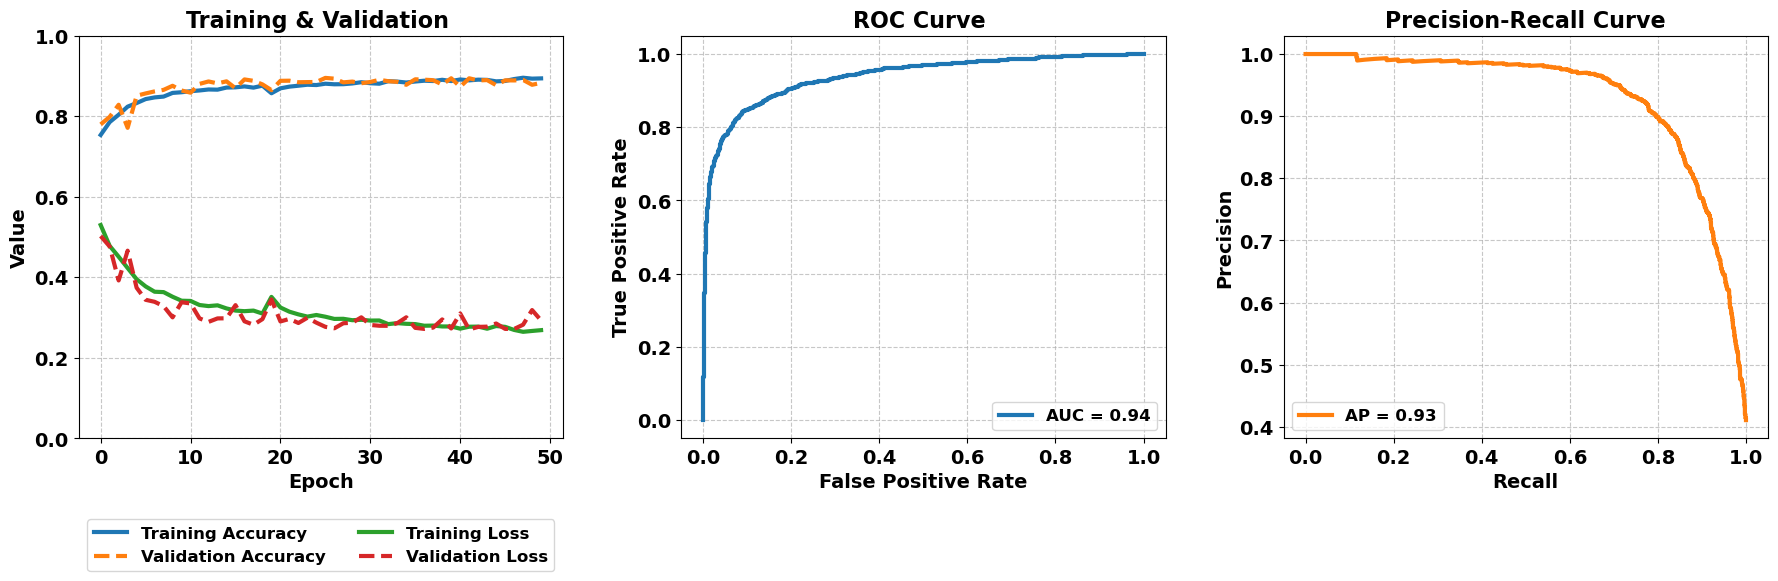

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# ======== Directories ========
training_acc_folder = 'training_accuracy'
validation_acc_folder = 'validation_accuracy'
training_loss_folder = 'training_loss'
validation_loss_folder = 'validation_loss'
base_folder = 'ROC-PRC'
prefix = "LT6"

# ======== Colors ========
colors = {
    'train_acc': '#1f77b4',     # Blue
    'val_acc': '#ff7f0e',       # Orange
    'train_loss': '#2ca02c',    # Green
    'val_loss': '#d62728',      # Red
    'roc': '#1f77b4',           # Blue
    'prc': '#ff7f0e'            # Orange
}

# ======== Helper Function to Load and Plot Accuracy/Loss ========
def load_and_plot_npy(folder_path, file_prefix, label, ax, linestyle, color):
    files = [f for f in os.listdir(folder_path) if f.startswith(file_prefix) and f.endswith('.npy')]
    for file in files:
        data = np.load(os.path.join(folder_path, file))
        ax.plot(data, label=label, linewidth=3, linestyle=linestyle, color=color)

# ======== Compute ROC/PRC ========
y_test_file = os.path.join(base_folder, f"{prefix}-y_test.npy")
y_pred_file = os.path.join(base_folder, f"{prefix}-y_pred_proba.npy")

if not (os.path.exists(y_test_file) and os.path.exists(y_pred_file)):
    raise FileNotFoundError("Missing ROC-PRC input files.")

y_test = np.load(y_test_file)
y_pred_proba = np.load(y_pred_file)

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# PRC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ap_score = average_precision_score(y_test, y_pred_proba)

# ======== Plotting: 3 Subplots Side by Side ========
plt.rcParams.update({
    'font.size': 14,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
})

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 plots side by side

# --- Subplot 1: Accuracy & Loss ---
ax = axes[0]
ax.set_title("Training & Validation ")
ax.set_xlabel("Epoch")
ax.set_ylabel("Value")
load_and_plot_npy(training_acc_folder, prefix, "Training Accuracy", ax, '-', colors['train_acc'])
load_and_plot_npy(validation_acc_folder, prefix, "Validation Accuracy", ax, '--', colors['val_acc'])
load_and_plot_npy(training_loss_folder, prefix, "Training Loss", ax, '-', colors['train_loss'])
load_and_plot_npy(validation_loss_folder, prefix, "Validation Loss", ax, '--', colors['val_loss'])
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
ax.legend(loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.35))

# --- Subplot 2: ROC Curve ---
ax = axes[1]
ax.plot(fpr, tpr, color=colors['roc'], linewidth=3, label=f"AUC = {roc_auc:.2f}")
ax.set_title("ROC Curve ")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc="lower right", fontsize=12)

# --- Subplot 3: PRC Curve ---
ax = axes[2]
ax.plot(recall, precision, color=colors['prc'], linewidth=3, label=f"AP = {ap_score:.2f}")
ax.set_title("Precision-Recall Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc="lower left", fontsize=12)

# ======== Final Layout & Save ========
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # space for legend in 1st plot
plt.savefig("LT6-Combined.png", dpi=300)
plt.show()


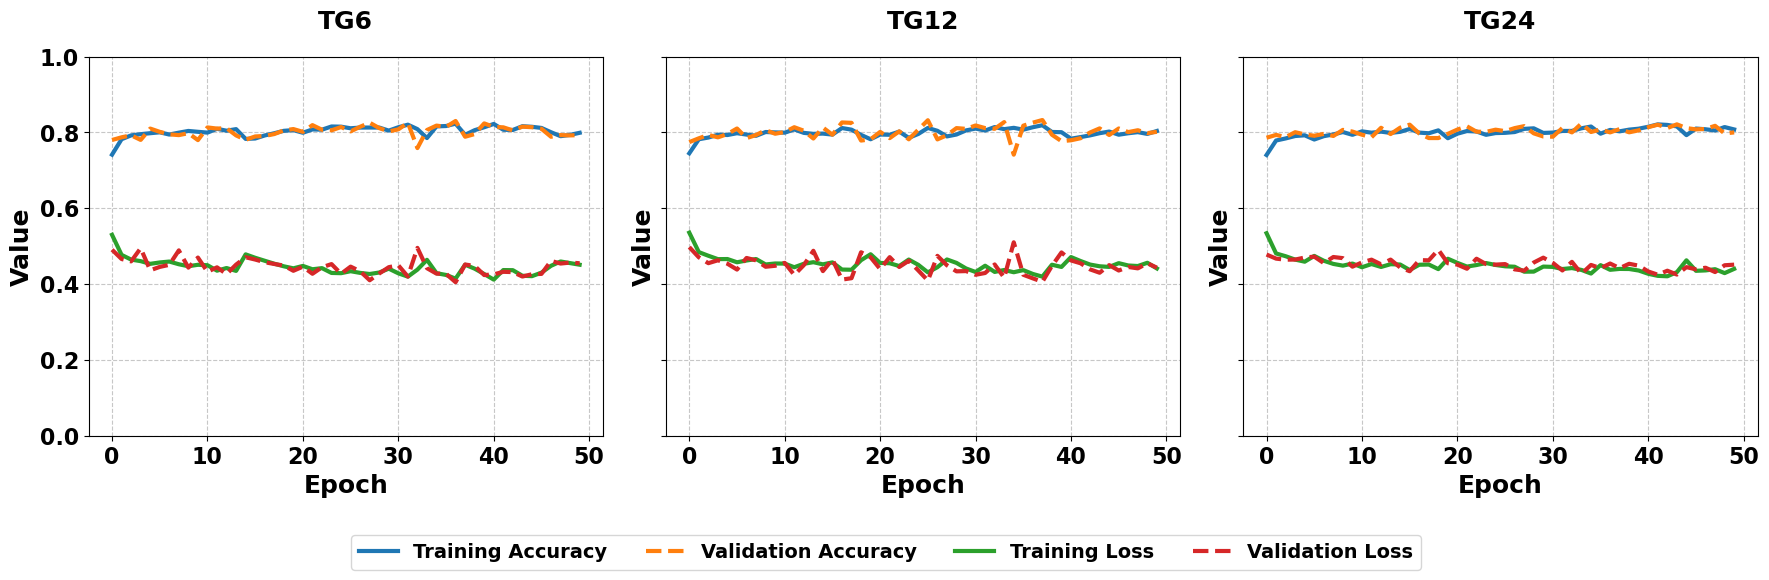

In [117]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the directories containing the .npy files
training_acc_folder = 'training_accuracy'
validation_acc_folder = 'validation_accuracy'
training_loss_folder = 'training_loss'
validation_loss_folder = 'validation_loss'

# Function to load and plot .npy files
def load_and_plot_npy(folder_path, file_prefix, label, ax, linestyle, color):
    # Get all .npy files starting with the specified prefix
    files = [f for f in os.listdir(folder_path) if f.startswith(file_prefix) and f.endswith('.npy')]
    
    # Plot each file
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = np.load(file_path)
        ax.plot(data, label=label, linewidth=3, linestyle=linestyle, color=color)

# Prefixes for different plots
prefixes = ["TG6", "TG12", "TG24"]
prefix_titles = prefixes  # Titles for each subplot

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'text.color': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
})

# Create a figure with 1 row and 3 columns (one subplot per prefix)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot accuracy and loss curves together for each prefix
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, orange, green, red
for i, (prefix, title) in enumerate(zip(prefixes, prefix_titles)):
    ax = axes[i]
    ax.set_xlabel("Epoch", fontsize=18, fontweight='bold', color='black')
    ax.set_ylabel("Value", fontsize=18, fontweight='bold', color='black')
    
    # Load and plot data for training and validation accuracy
    load_and_plot_npy(training_acc_folder, prefix, "Training Accuracy", ax, linestyle='-', color=colors[0])
    load_and_plot_npy(validation_acc_folder, prefix, "Validation Accuracy", ax, linestyle='--', color=colors[1])
    
    # Load and plot data for training and validation loss
    load_and_plot_npy(training_loss_folder, prefix, "Training Loss", ax, linestyle='-', color=colors[2])
    load_and_plot_npy(validation_loss_folder, prefix, "Validation Loss", ax, linestyle='--', color=colors[3])
    
    # Add title below each plot
    ax.set_title(title, pad=20)  # Increase padding for better visibility
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1)  # Adjust y-axis for better visibility

# Add a single legend below the x-axis
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', ncol=4, fontsize=14, bbox_to_anchor=(0.5, .1))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust space at the bottom for the legend
plt.savefig('TG.png', dpi=300, format='png')

# Show the plot
plt.show()


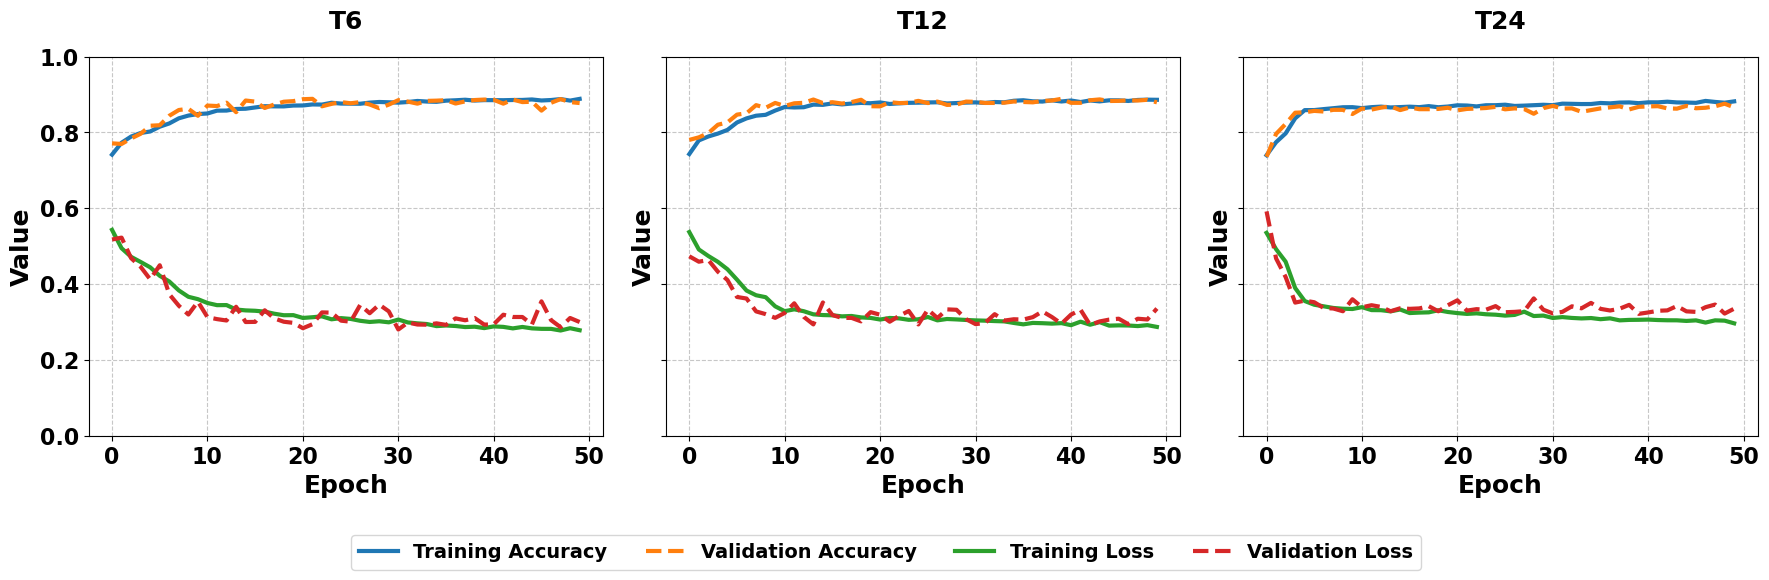

In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the directories containing the .npy files
training_acc_folder = 'training_accuracy'
validation_acc_folder = 'validation_accuracy'
training_loss_folder = 'training_loss'
validation_loss_folder = 'validation_loss'

# Function to load and plot .npy files
def load_and_plot_npy(folder_path, file_prefix, label, ax, linestyle, color):
    # Get all .npy files starting with the specified prefix
    files = [f for f in os.listdir(folder_path) if f.startswith(file_prefix) and f.endswith('.npy')]
    
    # Plot each file
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = np.load(file_path)
        ax.plot(data, label=label, linewidth=3, linestyle=linestyle, color=color)

# Prefixes for different plots
prefixes = ["T6", "T12", "T24"]
prefix_titles = prefixes  # Titles for each subplot

# Set global font size and style for the plot
plt.rcParams.update({
    'font.size': 16,
    'font.weight': 'bold',
    'text.color': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
})

# Create a figure with 1 row and 3 columns (one subplot per prefix)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot accuracy and loss curves together for each prefix
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, orange, green, red
for i, (prefix, title) in enumerate(zip(prefixes, prefix_titles)):
    ax = axes[i]
    ax.set_xlabel("Epoch", fontsize=18, fontweight='bold', color='black')
    ax.set_ylabel("Value", fontsize=18, fontweight='bold', color='black')
    
    # Load and plot data for training and validation accuracy
    load_and_plot_npy(training_acc_folder, prefix, "Training Accuracy", ax, linestyle='-', color=colors[0])
    load_and_plot_npy(validation_acc_folder, prefix, "Validation Accuracy", ax, linestyle='--', color=colors[1])
    
    # Load and plot data for training and validation loss
    load_and_plot_npy(training_loss_folder, prefix, "Training Loss", ax, linestyle='-', color=colors[2])
    load_and_plot_npy(validation_loss_folder, prefix, "Validation Loss", ax, linestyle='--', color=colors[3])
    
    # Add title below each plot
    ax.set_title(title, pad=20)  # Increase padding for better visibility
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1)  # Adjust y-axis for better visibility

# Add a single legend below the x-axis
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', ncol=4, fontsize=14, bbox_to_anchor=(0.5, .1))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust space at the bottom for the legend
plt.savefig('T.png', dpi=300, format='png')
# Show the plot
plt.show()


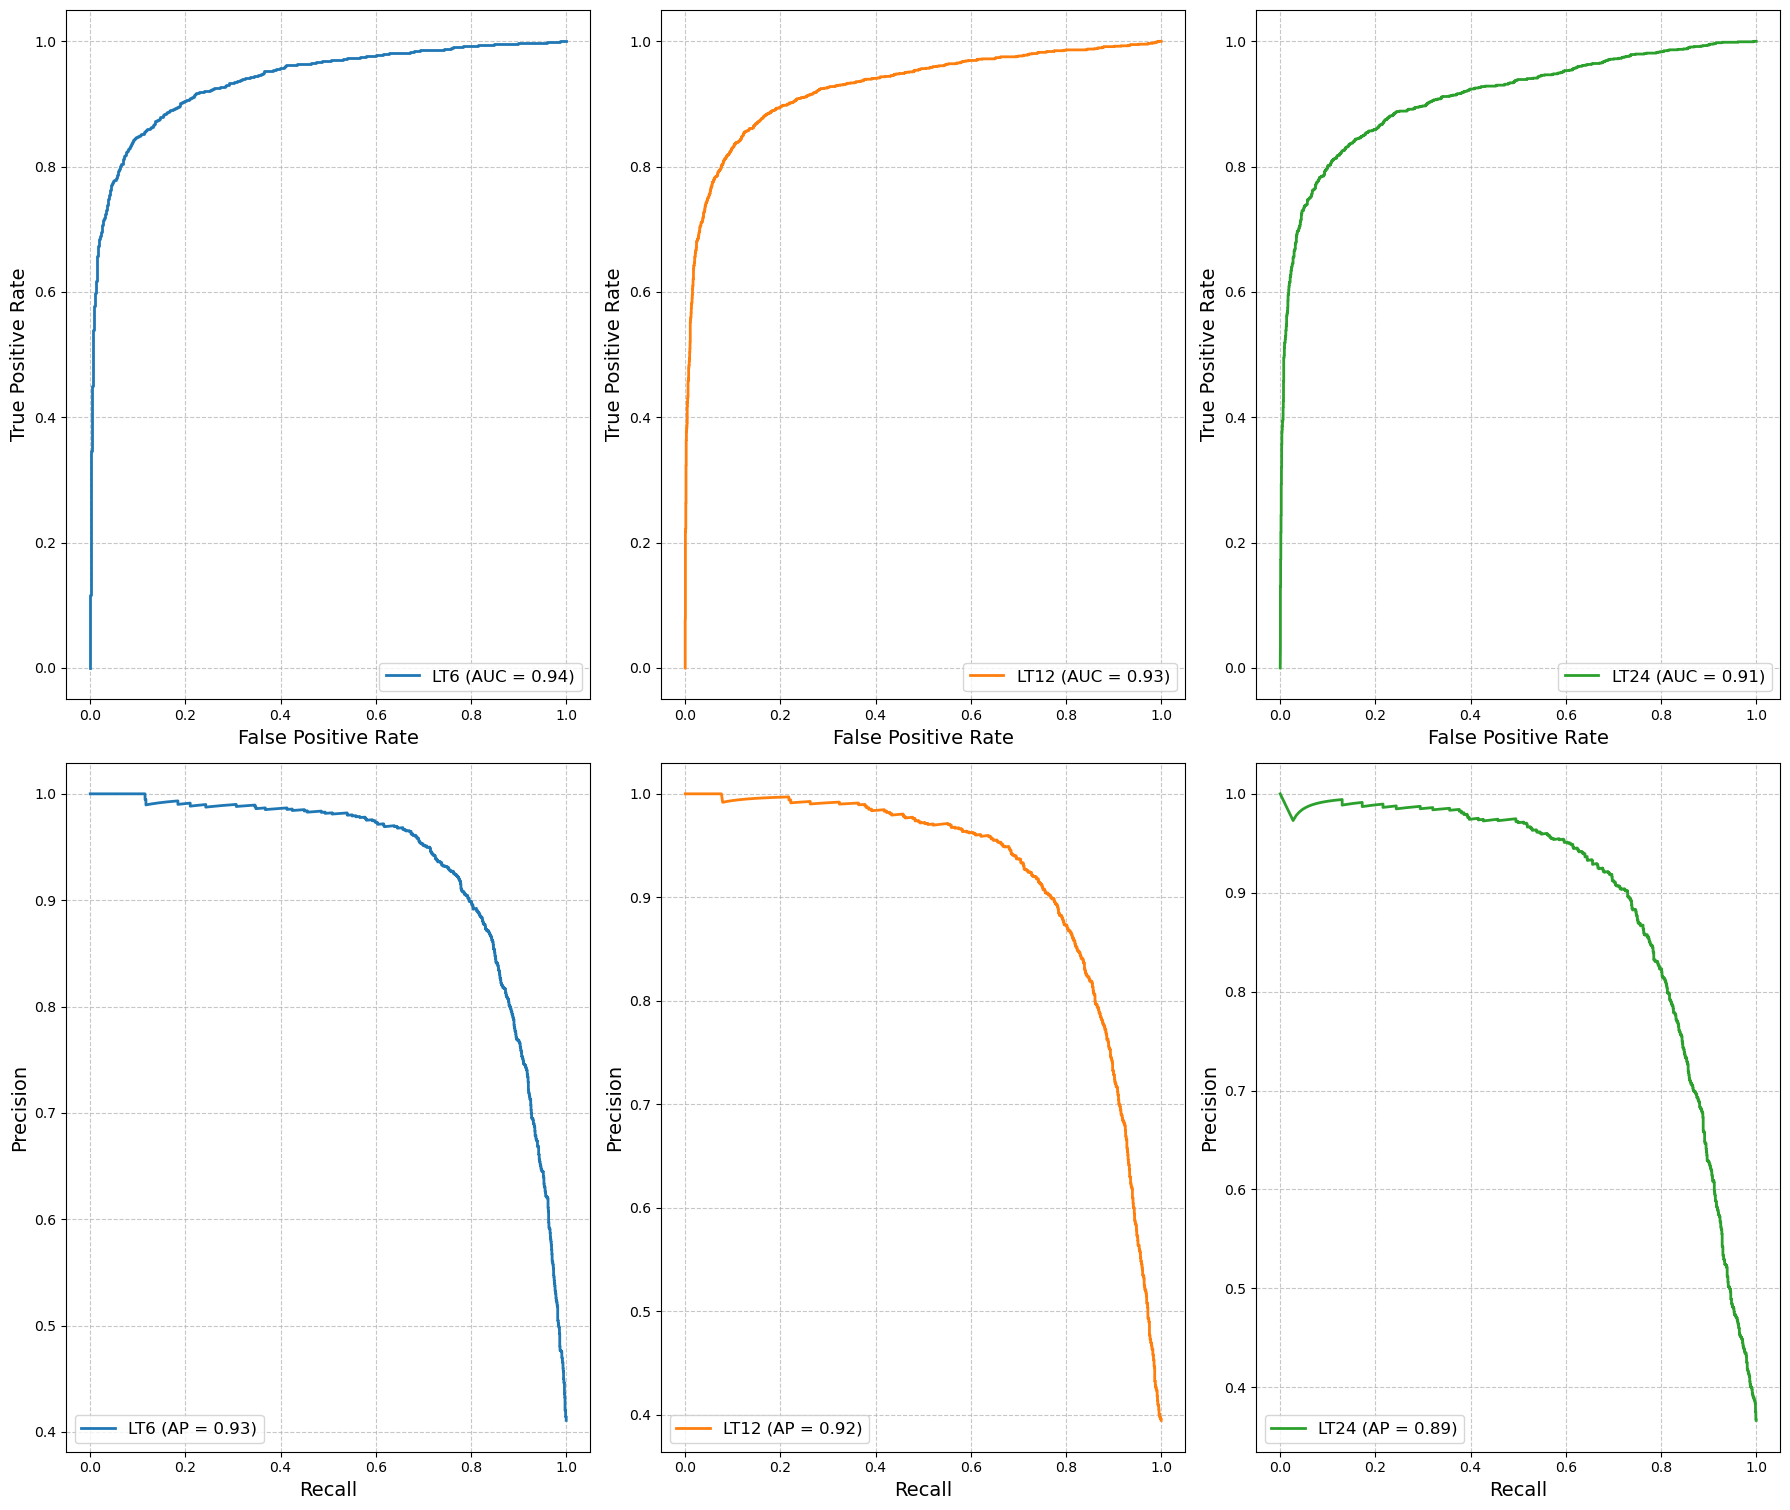

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Base folder containing the .npy files
base_folder = 'ROC-PRC'

# Prefixes and colors for the datasets
prefixes = ["LT6", "LT12", "LT24"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green for clarity

# Function to load and compute metrics for the curves
def compute_metrics(prefix):
    # Construct file paths for y_test and y_pred_proba
    y_test_file = os.path.join(base_folder, f"{prefix}-y_test.npy")
    y_pred_file = os.path.join(base_folder, f"{prefix}-y_pred_proba.npy")
    
    if not (os.path.exists(y_test_file) and os.path.exists(y_pred_file)):
        print(f"Missing files for {prefix}: {y_test_file} or {y_pred_file}")
        return None, None, None, None, None, None
    
    # Load the .npy files
    y_test = np.load(y_test_file)
    y_pred_proba = np.load(y_pred_file)
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute PRC metrics
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    
    return fpr, tpr, roc_auc, precision, recall, ap_score

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 16))  # 2 rows, 3 columns


# Loop through prefixes and plot on respective axes
for i, (prefix, color) in enumerate(zip(prefixes, colors)):
    # Compute metrics
    fpr, tpr, roc_auc, precision, recall, ap_score = compute_metrics(prefix)
    if fpr is None:
        continue  # Skip if files are missing
    
    # Plot ROC curve
    ax_roc = axes[0, i]  # First row
    ax_roc.plot(fpr, tpr, label=f"{prefix} (AUC = {roc_auc:.2f})", color=color, linewidth=2)

    ax_roc.set_xlabel("False Positive Rate", fontsize=14)
    ax_roc.set_ylabel("True Positive Rate", fontsize=14)
    ax_roc.legend(loc="lower right", fontsize=12)
    ax_roc.grid(True, linestyle='--', alpha=0.7)
    
    # Plot PRC curve
    ax_prc = axes[1, i]  # Second row
    ax_prc.plot(recall, precision, label=f"{prefix} (AP = {ap_score:.2f})", color=color, linewidth=2)

    ax_prc.set_xlabel("Recall", fontsize=14)
    ax_prc.set_ylabel("Precision", fontsize=14)
    ax_prc.legend(loc="lower left", fontsize=12)
    ax_prc.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()


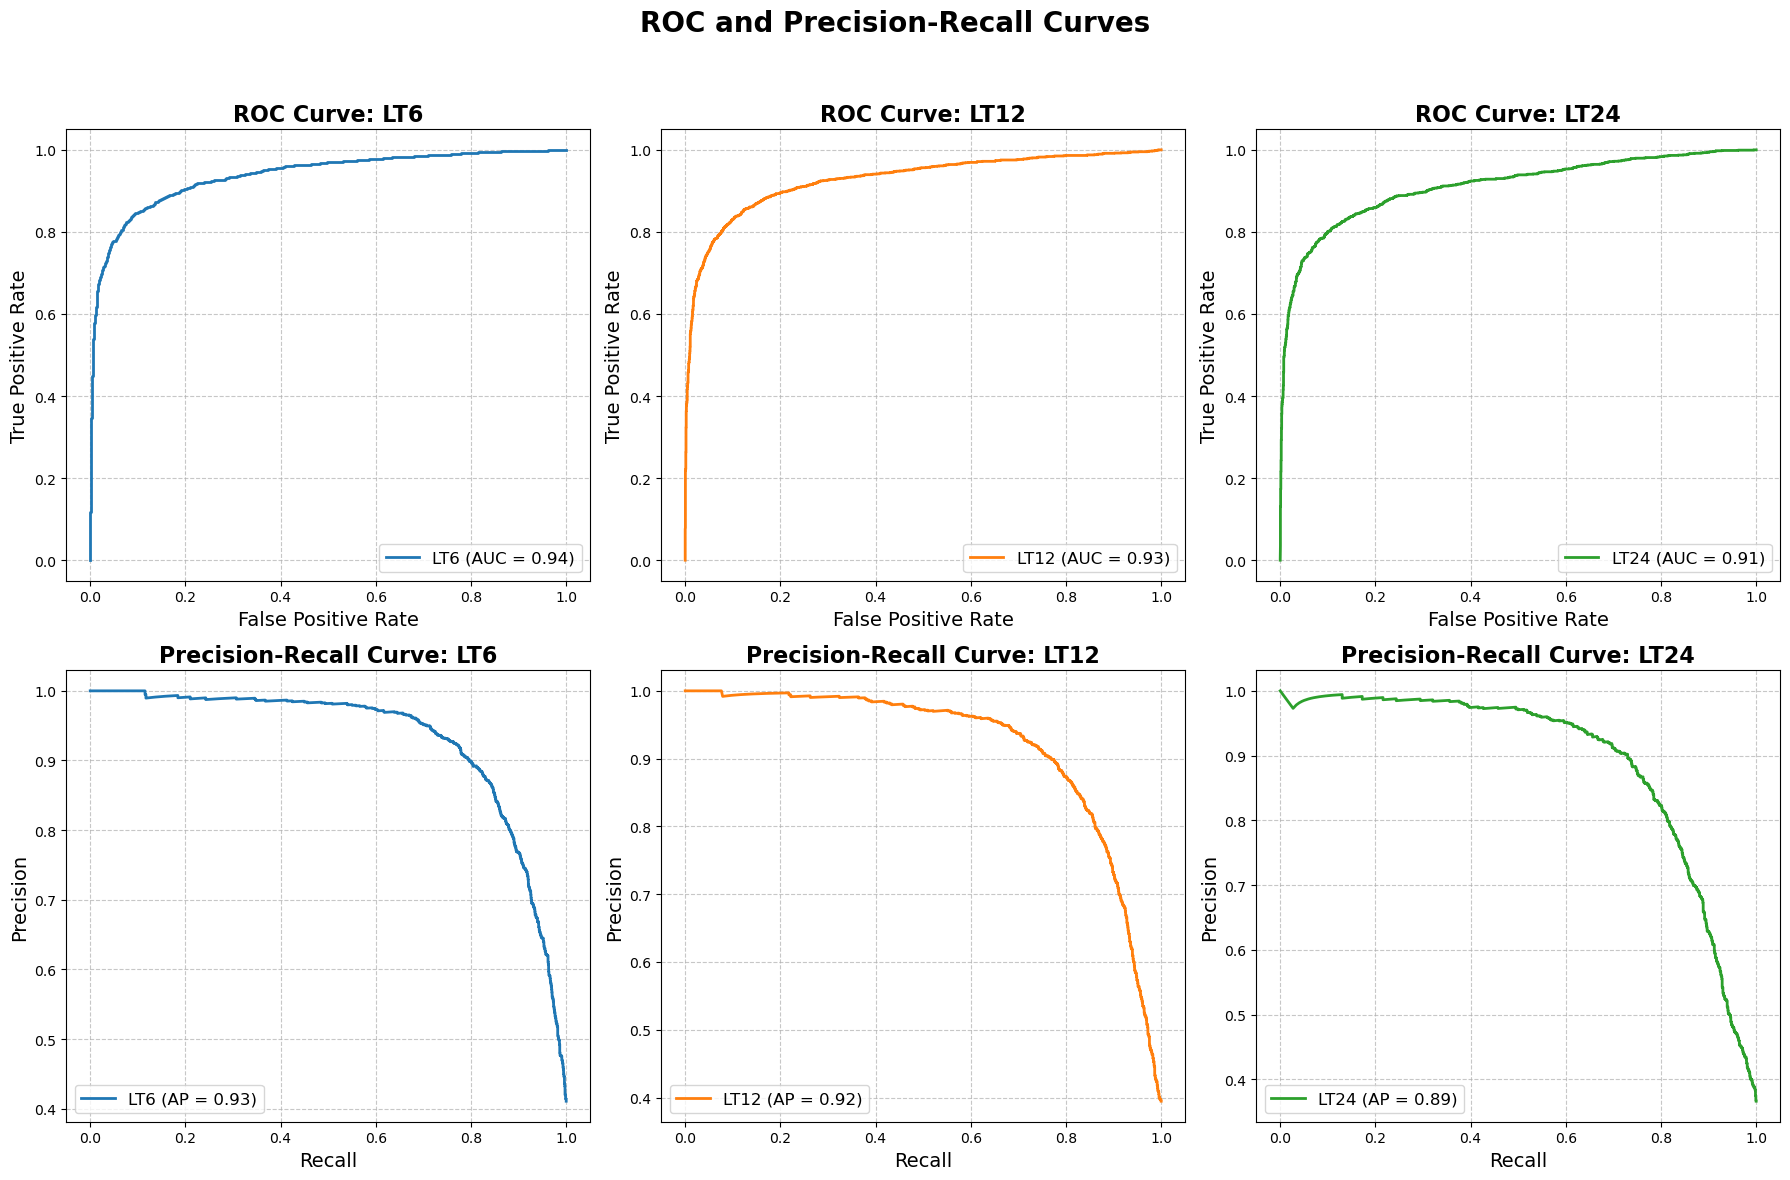

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Base folder containing the .npy files
base_folder = 'ROC-PRC'

# Prefixes and colors for the datasets
prefixes = ["LT6", "LT12", "LT24"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green for clarity

# Function to load and compute metrics for the curves
def compute_metrics(prefix):
    # Construct file paths for y_test and y_pred_proba
    y_test_file = os.path.join(base_folder, f"{prefix}-y_test.npy")
    y_pred_file = os.path.join(base_folder, f"{prefix}-y_pred_proba.npy")
    
    if not (os.path.exists(y_test_file) and os.path.exists(y_pred_file)):
        print(f"Missing files for {prefix}: {y_test_file} or {y_pred_file}")
        return None, None, None, None, None, None
    
    # Load the .npy files
    y_test = np.load(y_test_file)
    y_pred_proba = np.load(y_pred_file)
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute PRC metrics
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    
    return fpr, tpr, roc_auc, precision, recall, ap_score

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
fig.suptitle("ROC and Precision-Recall Curves", fontsize=20, fontweight='bold')

# Loop through prefixes and plot on respective axes
for i, (prefix, color) in enumerate(zip(prefixes, colors)):
    # Compute metrics
    fpr, tpr, roc_auc, precision, recall, ap_score = compute_metrics(prefix)
    if fpr is None:
        continue  # Skip if files are missing
    
    # Plot ROC curve
    ax_roc = axes[0, i]  # First row
    ax_roc.plot(fpr, tpr, label=f"{prefix} (AUC = {roc_auc:.2f})", color=color, linewidth=2)
    ax_roc.set_title(f"ROC Curve: {prefix}", fontsize=16, fontweight='bold')
    ax_roc.set_xlabel("False Positive Rate", fontsize=14)
    ax_roc.set_ylabel("True Positive Rate", fontsize=14)
    ax_roc.legend(loc="lower right", fontsize=12)
    ax_roc.grid(True, linestyle='--', alpha=0.7)
    
    # Plot PRC curve
    ax_prc = axes[1, i]  # Second row
    ax_prc.plot(recall, precision, label=f"{prefix} (AP = {ap_score:.2f})", color=color, linewidth=2)
    ax_prc.set_title(f"Precision-Recall Curve: {prefix}", fontsize=16, fontweight='bold')
    ax_prc.set_xlabel("Recall", fontsize=14)
    ax_prc.set_ylabel("Precision", fontsize=14)
    ax_prc.legend(loc="lower left", fontsize=12)
    ax_prc.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()


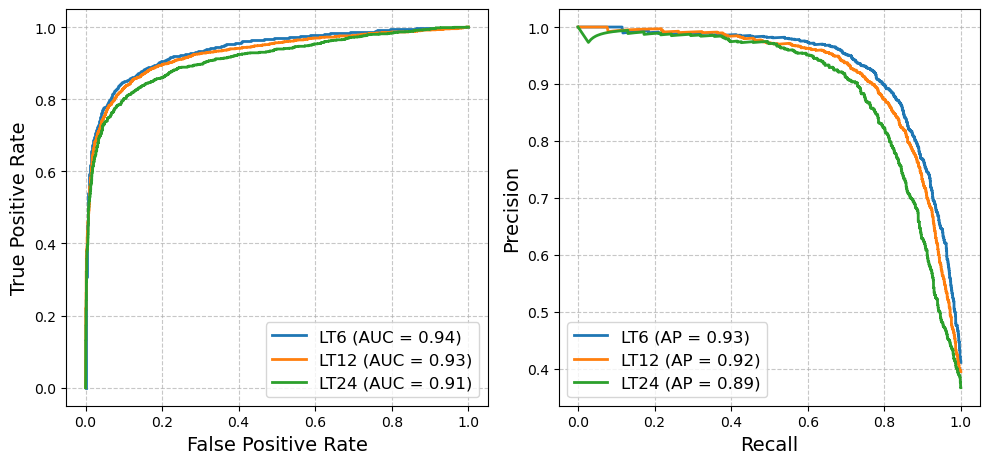

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Base folder containing the .npy files
base_folder = 'ROC-PRC'

# Prefixes and colors for the datasets
prefixes = ["LT6", "LT12", "LT24"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green for clarity

# Function to load and compute metrics for the curves
def compute_metrics(prefix):
    # Construct file paths for y_test and y_pred_proba
    y_test_file = os.path.join(base_folder, f"{prefix}-y_test.npy")
    y_pred_file = os.path.join(base_folder, f"{prefix}-y_pred_proba.npy")
    
    if not (os.path.exists(y_test_file) and os.path.exists(y_pred_file)):
        print(f"Missing files for {prefix}: {y_test_file} or {y_pred_file}")
        return None, None, None, None, None, None
    
    # Load the .npy files
    y_test = np.load(y_test_file)
    y_pred_proba = np.load(y_pred_file)
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute PRC metrics
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    
    return fpr, tpr, roc_auc, precision, recall, ap_score

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Prepare ROC and PRC curves
for prefix, color in zip(prefixes, colors):
    # Compute metrics
    fpr, tpr, roc_auc, precision, recall, ap_score = compute_metrics(prefix)
    if fpr is None:
        continue  # Skip if files are missing

    # Plot ROC curve
    axes[0].plot(fpr, tpr, label=f"{prefix} (AUC = {roc_auc:.2f})", color=color, linewidth=2)

    # Plot PRC curve
    axes[1].plot(recall, precision, label=f"{prefix} (AP = {ap_score:.2f})", color=color, linewidth=2)

# Customize ROC subplot

axes[0].set_xlabel("False Positive Rate", fontsize=14)
axes[0].set_ylabel("True Positive Rate", fontsize=14)
axes[0].legend(loc="lower right", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Customize PRC subplot

axes[1].set_xlabel("Recall", fontsize=14)
axes[1].set_ylabel("Precision", fontsize=14)
axes[1].legend(loc="lower left", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


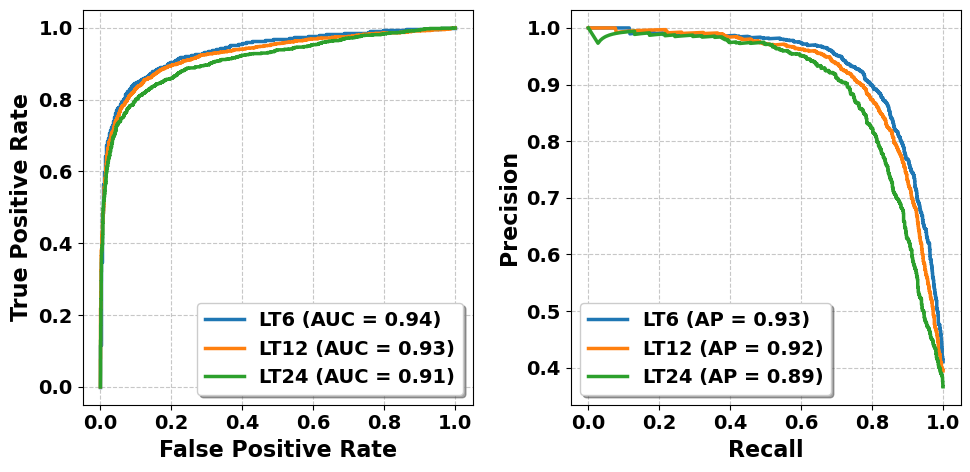

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Base folder containing the .npy files
base_folder = 'ROC-PRC'

# Prefixes and colors for the datasets
prefixes = ["LT6", "LT12", "LT24"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green for clarity

# Function to load and compute metrics for the curves
def compute_metrics(prefix):
    # Construct file paths for y_test and y_pred_proba
    y_test_file = os.path.join(base_folder, f"{prefix}-y_test.npy")
    y_pred_file = os.path.join(base_folder, f"{prefix}-y_pred_proba.npy")
    
    if not (os.path.exists(y_test_file) and os.path.exists(y_pred_file)):
        print(f"Missing files for {prefix}: {y_test_file} or {y_pred_file}")
        return None, None, None, None, None, None
    
    # Load the .npy files
    y_test = np.load(y_test_file)
    y_pred_proba = np.load(y_pred_file)
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute PRC metrics
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    
    return fpr, tpr, roc_auc, precision, recall, ap_score

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns for better aspect ratio

# Prepare ROC and PRC curves
for prefix, color in zip(prefixes, colors):
    # Compute metrics
    fpr, tpr, roc_auc, precision, recall, ap_score = compute_metrics(prefix)
    if fpr is None:
        continue  # Skip if files are missing

    # Plot ROC curve
    axes[0].plot(fpr, tpr, label=f"{prefix} (AUC = {roc_auc:.2f})", color=color, linewidth=2.5)

    # Plot PRC curve
    axes[1].plot(recall, precision, label=f"{prefix} (AP = {ap_score:.2f})", color=color, linewidth=2.5)



# Customize ROC subplot
axes[0].set_xlabel("False Positive Rate", fontsize=16, fontweight='bold', color='black')
axes[0].set_ylabel("True Positive Rate", fontsize=16, fontweight='bold', color='black')
axes[0].tick_params(axis='both', labelsize=14, colors='black')
axes[0].legend(loc="lower right", fontsize=14, frameon=True, shadow=True)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Customize PRC subplot
axes[1].set_xlabel("Recall", fontsize=16, fontweight='bold', color='black')
axes[1].set_ylabel("Precision", fontsize=16, fontweight='bold', color='black')
axes[1].tick_params(axis='both', labelsize=14, colors='black')
axes[1].legend(loc="lower left", fontsize=14, frameon=True, shadow=True)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 1])  # Removes extra padding
plt.savefig('LT-roc-prc.png', dpi=300, format='png')
plt.show()


In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
from collections import defaultdict

# Set your path to the directory containing .npy files
data_dir = 'ROC-PRC'  # <-- change this

# List all .npy files
all_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

# Group files by model prefix (e.g., "L12", "T24", etc.)
file_groups = defaultdict(dict)
for fname in all_files:
    prefix = fname.split('-')[0]
    if 'test' in fname:
        file_groups[prefix]['y_true'] = os.path.join(data_dir, fname)
    elif 'pred_proba' in fname:
        file_groups[prefix]['y_proba'] = os.path.join(data_dir, fname)
    elif 'pred' in fname:
        file_groups[prefix]['y_pred'] = os.path.join(data_dir, fname)

# Evaluate all models
results = []

for model, files in file_groups.items():
    try:
        y_true = np.load(files['y_true'])
        y_pred = np.load(files['y_pred'])
        y_proba = np.load(files['y_proba']) if 'y_proba' in files else None

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)

        # Fix for 1D probability vectors
        if y_proba is not None:
            roc = roc_auc_score(y_true, y_proba)
            prc = average_precision_score(y_true, y_proba)
        else:
            roc = None
            prc = None

        results.append({
            'Model': model,
            'Accuracy': acc,
            'F1 Score': f1,
            'Precision': prec,
            'Recall': rec,
            'ROC AUC': roc,
            'PRC AUC': prc
        })
    except Exception as e:
        print(f"Error processing model {model}: {e}")

# Convert to DataFrame and show
results_df = pd.DataFrame(results)
print(results_df)

# Save if needed
results_df.to_csv("model_evaluation_results.csv", index=False)


Error processing model TG6: 'y_pred'
   Model  Accuracy  F1 Score  Precision    Recall   ROC AUC   PRC AUC
0    L12  0.622627  0.120741   0.748148  0.065670  0.513805  0.417659
1    L24  0.668045  0.290931   0.669377  0.185854  0.572331  0.433653
2     L6  0.652493  0.416985   0.670765  0.302526  0.659534  0.594030
3   LT12  0.875064  0.835529   0.869290  0.804291  0.927311  0.917354
4   LT24  0.846430  0.799712   0.765840  0.836719  0.911430  0.891937
5    LT6  0.881802  0.853375   0.870038  0.837338  0.937917  0.929701
6    T12  0.870959  0.818083   0.921760  0.735371  0.932157  0.920758
7    T24  0.870416  0.812000   0.866781  0.763732  0.914129  0.901219
8     T6  0.874968  0.831629   0.930587  0.751694  0.856303  0.801517
9   TG12  0.801437  0.748701   0.747730  0.749675  0.866699  0.813087
10  TG24  0.799835  0.728293   0.724497  0.732129  0.859239  0.790058


In [17]:
np.load("ROC-PRC/TG6-y_pred_proba.npy").shape

FileNotFoundError: [Errno 2] No such file or directory: 'ROC-PRC/TG6-y_pred_proba.npy'

In [9]:
np.load("ROC-PRC/L12-y_test.npy")

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
import pandas as pd

# Hardcoded final data with reordered metrics and model names
data = {
    'Model': ['LSTM', 'TG LSTM', 'Transformer', 'Transformer LSTM'],
    '6h_Accuracy': ['.65', 'NaN', '.87', '.88'],
    '6h_F1': ['.42', 'NaN', '.83', '.85'],
    '6h_Precision': ['.67', 'NaN', '.93', '.87'],
    '6h_Recall': ['.30', 'NaN', '.75', '.84'],
    '6h_ROC AUC': ['.66', 'NaN', '.86', '.94'],
    '6h_PRC AUC': ['.59', 'NaN', '.80', '.93'],
    '12h_Accuracy': ['.62', '.80', '.87', '.88'],
    '12h_F1': ['.12', '.75', '.82', '.84'],
    '12h_Precision': ['.75', '.75', '.92', '.87'],
    '12h_Recall': ['.07', '.75', '.74', '.80'],
    '12h_ROC AUC': ['.51', '.87', '.93', '.93'],
    '12h_PRC AUC': ['.42', '.81', '.92', '.92'],
    '24h_Accuracy': ['.67', '.80', '.87', '.85'],
    '24h_F1': ['.29', '.73', '.81', '.80'],
    '24h_Precision': ['.67', '.72', '.87', '.77'],
    '24h_Recall': ['.19', '.73', '.76', '.84'],
    '24h_ROC AUC': ['.57', '.86', '.91', '.91'],
    '24h_PRC AUC': ['.43', '.79', '.90', '.89'],
}

# Create DataFrame
final_df = pd.DataFrame(data)

# Export to CSV
final_df.to_csv("final_model_performance.csv", index=False)

print("File 'final_model_performance.csv' has been saved.")


File 'final_model_performance.csv' has been saved.
